# Mental Health in Tech Professionals - EDA Project
### By: Aditi Arun Chaudhari


Github Link:

Mental Health in Tech Professionals

**1. Introduction**

Mental health is a critical part of overall well-being, impacting productivity, creativity, and job satisfaction.

The tech industry is known for long working hours, high stress, and tight deadlines, which often lead to burnout, anxiety, and depression.

Despite being important, mental health issues in workplaces are often underreported due to stigma.

**2. Why Tech Professionals?**

Tech employees face unique challenges:

Rapidly changing technology → pressure to constantly upskill.

Irregular working hours → especially in startups & global teams.

Remote work isolation → reduced social support.

Workplace culture → stigma in discussing mental health.

According to surveys:

Over 50% of tech workers have experienced mental health challenges.

Many don’t seek help because they fear negative career impact.

**3. About the Dataset (OSMI Survey)**

Dataset: Open Sourcing Mental Illness (OSMI) annual survey.

Covers:

Demographics (age, gender, country, company size).

Workplace support (mental health benefits, employer attitudes).

Personal factors (seeking help, stigma, mental health consequences).

Purpose: To understand how workplace environment influences mental health in tech.

**4. Research Questions (Your EDA Focus)**

Some example questions your analysis can answer:

How does gender influence willingness to seek help?

Do companies providing benefits reduce negative consequences?

How is India different from global trends?

Does remote work affect mental health positively or negatively?

**5. Importance of This Study**

Raises awareness about mental health stigma in workplaces.

Helps companies design better policies (like offering counseling, flexible hours).

Encourages employees to seek help without fear.

Unique because it combines data science + social impact.



**Summary – Mental Health in Tech Professionals**

Mental health is a major concern in the tech industry, where long hours, high stress, and constant upskilling often lead to burnout, anxiety, and depression.

Many employees avoid seeking help due to stigma and fear of career impact.

The OSMI Mental Health in Tech Survey provides insights into demographics, workplace support, stigma, and employee attitudes toward mental health.

Our analysis shows:
**bold text**
Gender differences – Women are more open to discussing and seeking help.

India vs Global – Fewer Indian companies provide mental health benefits compared to global averages.

Company support matters – Employees in organizations with benefits face fewer negative consequences.

Remote work helps – Remote workers report less stigma and are more willing to seek help.

Conclusion: Mental health support in workplaces is essential. Companies must encourage open discussions, provide benefits, and reduce stigma to improve employee well-being.


**Install/Import Required Libraries**

In [ ]:
# Install required packages (if not already available)
!pip install plotly

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Set seaborn theme
sns.set_theme(style="whitegrid")
sns.set_palette("Set2")


**Upload CSV File**

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving survey.csv to survey.csv


**Load the Dataset**

In [ ]:
df = pd.read_csv("survey.csv")

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (1259, 27)


,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


**Data Cleaning**

In [ ]:
# Drop irrelevant columns
drop_cols = ["Timestamp", "comments"]
df = df.drop(columns=[col for col in drop_cols if col in df.columns], errors="ignore")

# Filter reasonable ages
if "Age" in df.columns:
    df = df[(df["Age"] >= 15) & (df["Age"] <= 80)]

# Drop rows with missing values
df = df.dropna()

print("After cleaning:", df.shape)


After cleaning: (587, 25)


**Basic EDA**

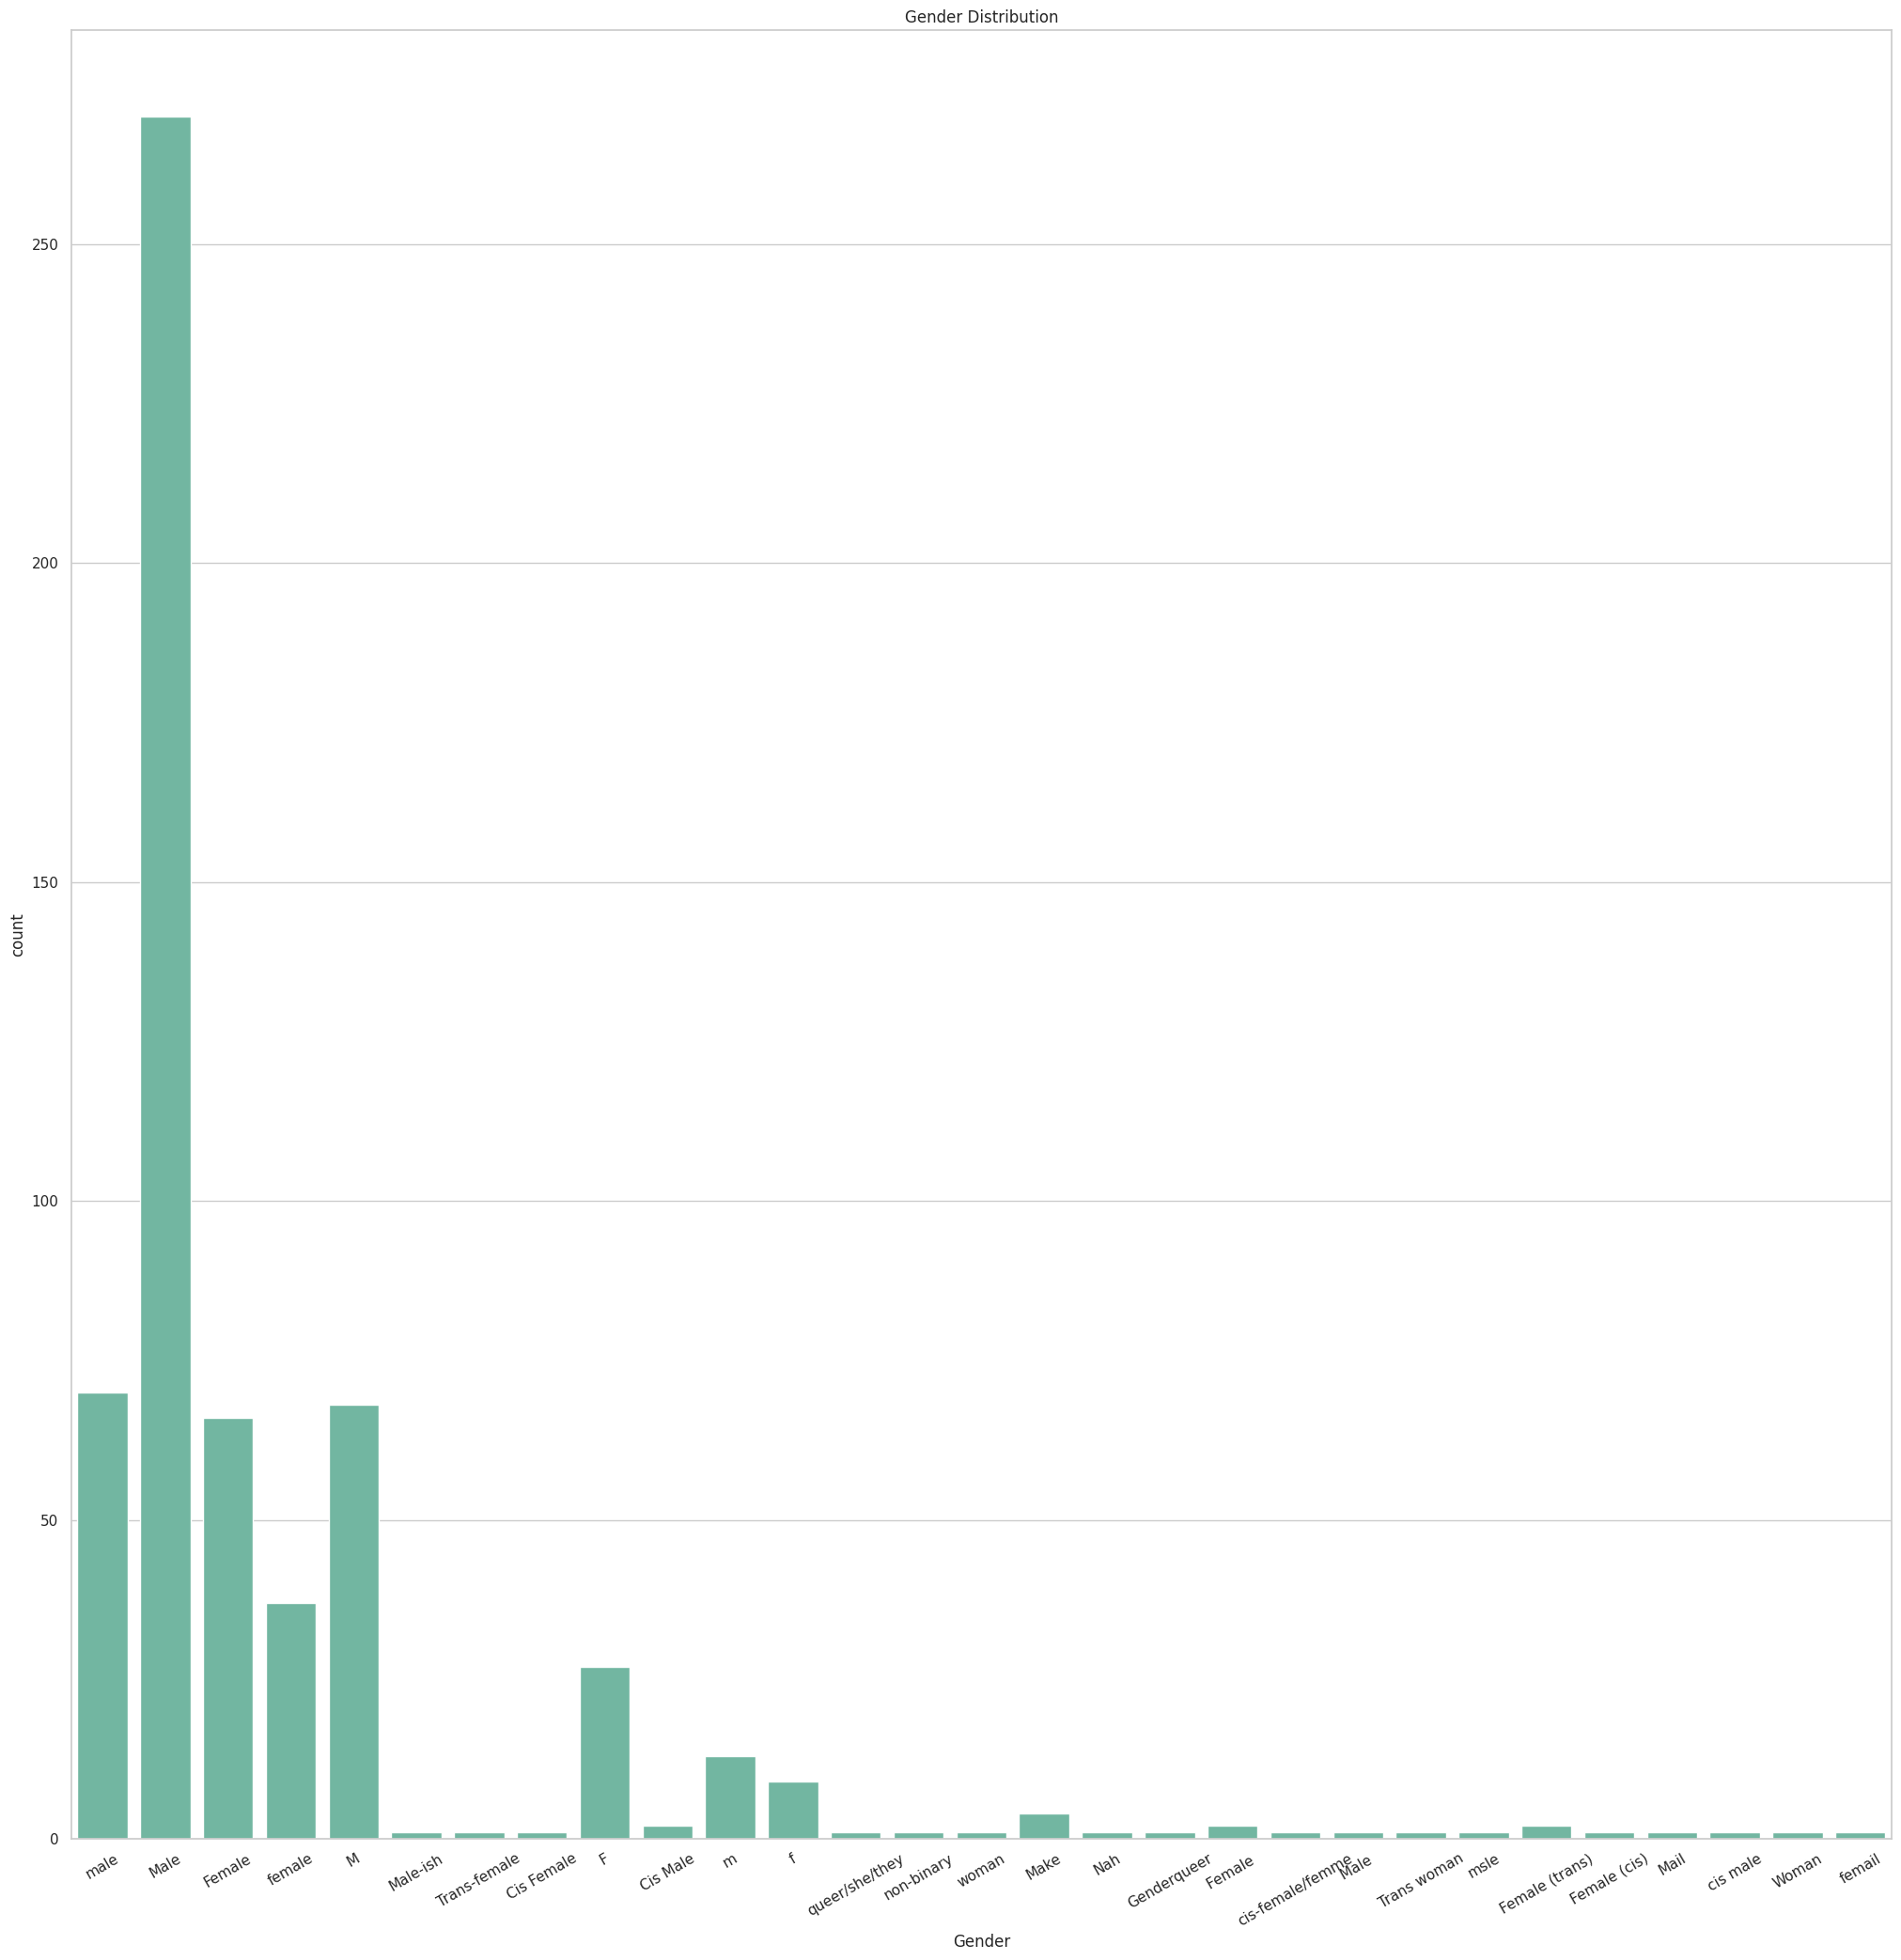

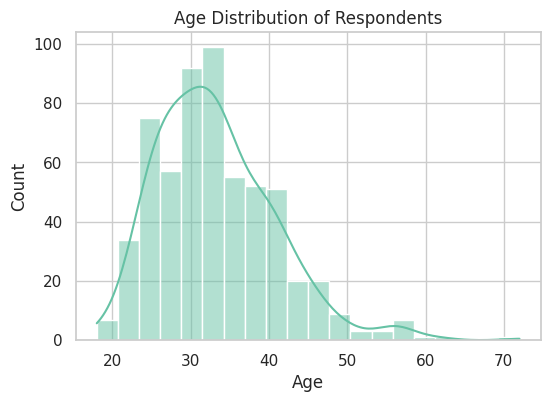

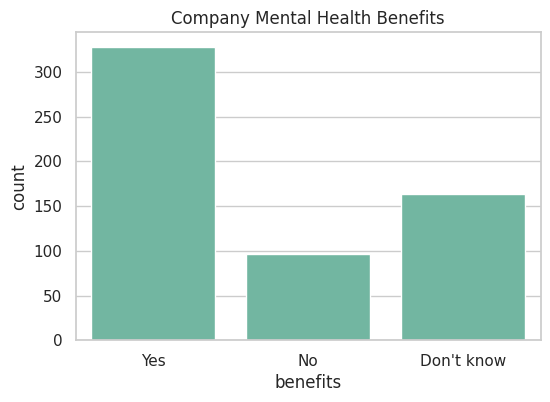

In [ ]:
# Gender distribution
plt.figure(figsize=(25,25))
sns.countplot(data=df, x="Gender")
plt.title("Gender Distribution")
plt.xticks(rotation=30)
plt.show()

# Age distribution
if "Age" in df.columns:
    plt.figure(figsize=(6,4))
    sns.histplot(df["Age"], bins=20, kde=True)
    plt.title("Age Distribution of Respondents")
    plt.show()

# Company benefits
if "benefits" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="benefits")
    plt.title("Company Mental Health Benefits")
    plt.show()


**India vs Global Comparison**

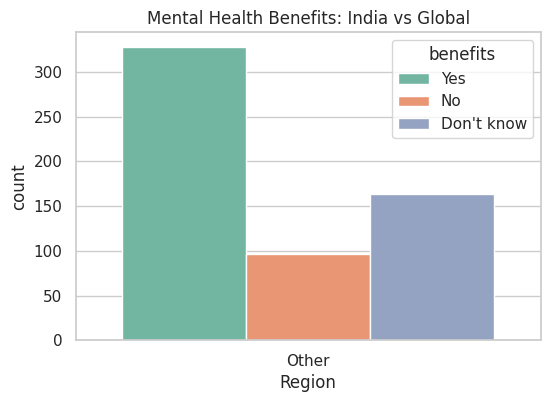

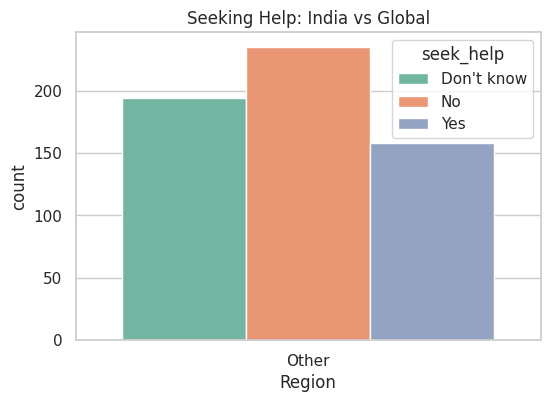

In [ ]:
if "Country" in df.columns:
    df["Region"] = df["Country"].apply(lambda x: "India" if x == "India" else "Other")

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Region", hue="benefits")
    plt.title("Mental Health Benefits: India vs Global")
    plt.show()

    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="Region", hue="seek_help")
    plt.title("Seeking Help: India vs Global")
    plt.show()




**Interactive Plotly Visuals**

In [ ]:
# --------------------------
# Interactive Visualizations (Plotly) - Safe Version
# --------------------------

# 1. Age vs Gender
if "Age" in df.columns and "Gender" in df.columns:
    fig = px.histogram(df, x="Age", color="Gender", nbins=20,
                       title="Interactive Age vs Gender Distribution",
                       template="plotly_white")
    fig.show()

# 2. Company Size vs Benefits
if "company_size" in df.columns and "benefits" in df.columns:
    fig2 = px.histogram(df, x="company_size", color="benefits",
                        title="Interactive Company Size vs Benefits",
                        template="plotly_white")
    fig2.show()

# 3. Gender Distribution (Pie)
if "Gender" in df.columns:
    fig3 = px.pie(df, names="Gender",
                  title="Interactive Gender Distribution")
    fig3.show()

# 4. Age vs Treatment (Box)
if "treatment" in df.columns and "Age" in df.columns:
    fig4 = px.box(df, x="treatment", y="Age", color="treatment",
                  title="Age Distribution: Treatment vs No Treatment")
    fig4.show()

# 5. Country-wise Distribution (Fixed)
if "Country" in df.columns:
    country_data = df['Country'].value_counts().head(10).reset_index()
    country_data.columns = ['Country', 'Count']  # proper names

    fig5 = px.bar(country_data, x='Country', y='Count',
                  title="Top 10 Countries of Respondents",
                  template="plotly_white")
    fig5.show()

# 6. Treatment by Gender
if "Gender" in df.columns and "treatment" in df.columns:
    fig6 = px.bar(df, x="Gender", color="treatment",
                  title="Treatment by Gender",
                  barmode="group",
                  template="plotly_white")
    fig6.show()

# 7. Company Size vs Treatment
if "no_employees" in df.columns and "treatment" in df.columns:
    fig7 = px.histogram(df, x="no_employees", color="treatment",
                        title="Treatment by Company Size",
                        template="plotly_white")
    fig7.show()

# 8. Work Interference vs Treatment
if "work_interfere" in df.columns and "treatment" in df.columns:
    fig8 = px.bar(df, x="work_interfere", color="treatment",
                  title="Work Interference and Treatment",
                  template="plotly_white")
    fig8.show()

# 9. Correlation Heatmap (numeric only)
import plotly.figure_factory as ff
corr = df.corr(numeric_only=True)
if corr.shape[0] > 0:  # only if numeric cols exist
    fig9 = ff.create_annotated_heatmap(
        z=corr.values,
        x=list(corr.columns),
        y=list(corr.index),
        colorscale="Viridis",
        showscale=True
    )
    fig9.update_layout(title="Correlation Heatmap")
    fig9.show()

# 10. Remote Work Distribution (Pie)
if "remote_work" in df.columns:
    fig10 = px.pie(df, names="remote_work",
                   title="Remote Work Distribution")
    fig10.show()

# 11. Treatment Distribution (Pie)
if "treatment" in df.columns:
    fig11 = px.pie(df, names="treatment",
                   title="Treatment Distribution")
    fig11.show()




**Hypothesis Testing**



In [ ]:
from scipy.stats import chi2_contingency, ttest_ind

# -------------------------------
# Hypothesis Test 1: Benefits vs Treatment (Chi-Square Test)
# -------------------------------

contingency = pd.crosstab(df['benefits'], df['treatment'])
chi2, p, dof, expected = chi2_contingency(contingency)

print(" Hypothesis Test 1: Benefits vs Treatment")
print("Chi2 Stat =", chi2, " | p-value =", p)

if p < 0.05:
    print("Reject H0: There is a significant relationship between company benefits and employees seeking treatment.")
else:
    print("Fail to Reject H0: No significant relationship found.")


# -------------------------------
# Hypothesis Test 2: Age vs Treatment (T-Test)
# -------------------------------

age_seek = df[df['treatment'] == 'Yes']['Age']
age_no_seek = df[df['treatment'] == 'No']['Age']

t_stat, p_val = ttest_ind(age_seek, age_no_seek)

print("\n   Hypothesis Test 2: Age vs Treatment")
print("t-stat =", t_stat, " | p-value =", p_val)

if p_val < 0.05:
    print(" Reject H0: Age has a significant impact on whether employees seek treatment.")
else:
    print(" Fail to Reject H0: Age does not significantly affect seeking treatment.")



 Hypothesis Test 1: Benefits vs Treatment
Chi2 Stat = 26.894557845395198  | p-value = 1.4451767541092985e-06
Reject H0: There is a significant relationship between company benefits and employees seeking treatment.

   Hypothesis Test 2: Age vs Treatment
t-stat = -0.13004789763642527  | p-value = 0.8965732354036874
 Fail to Reject H0: Age does not significantly affect seeking treatment.


**Extra Insights**

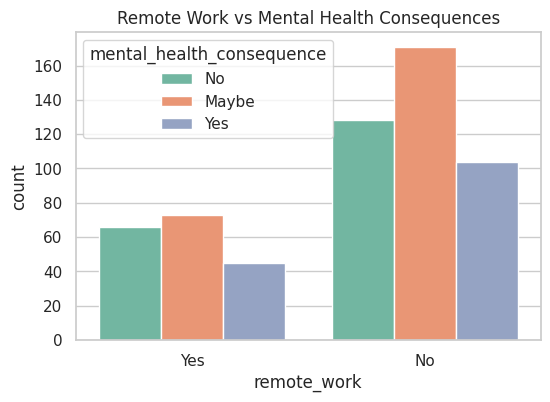

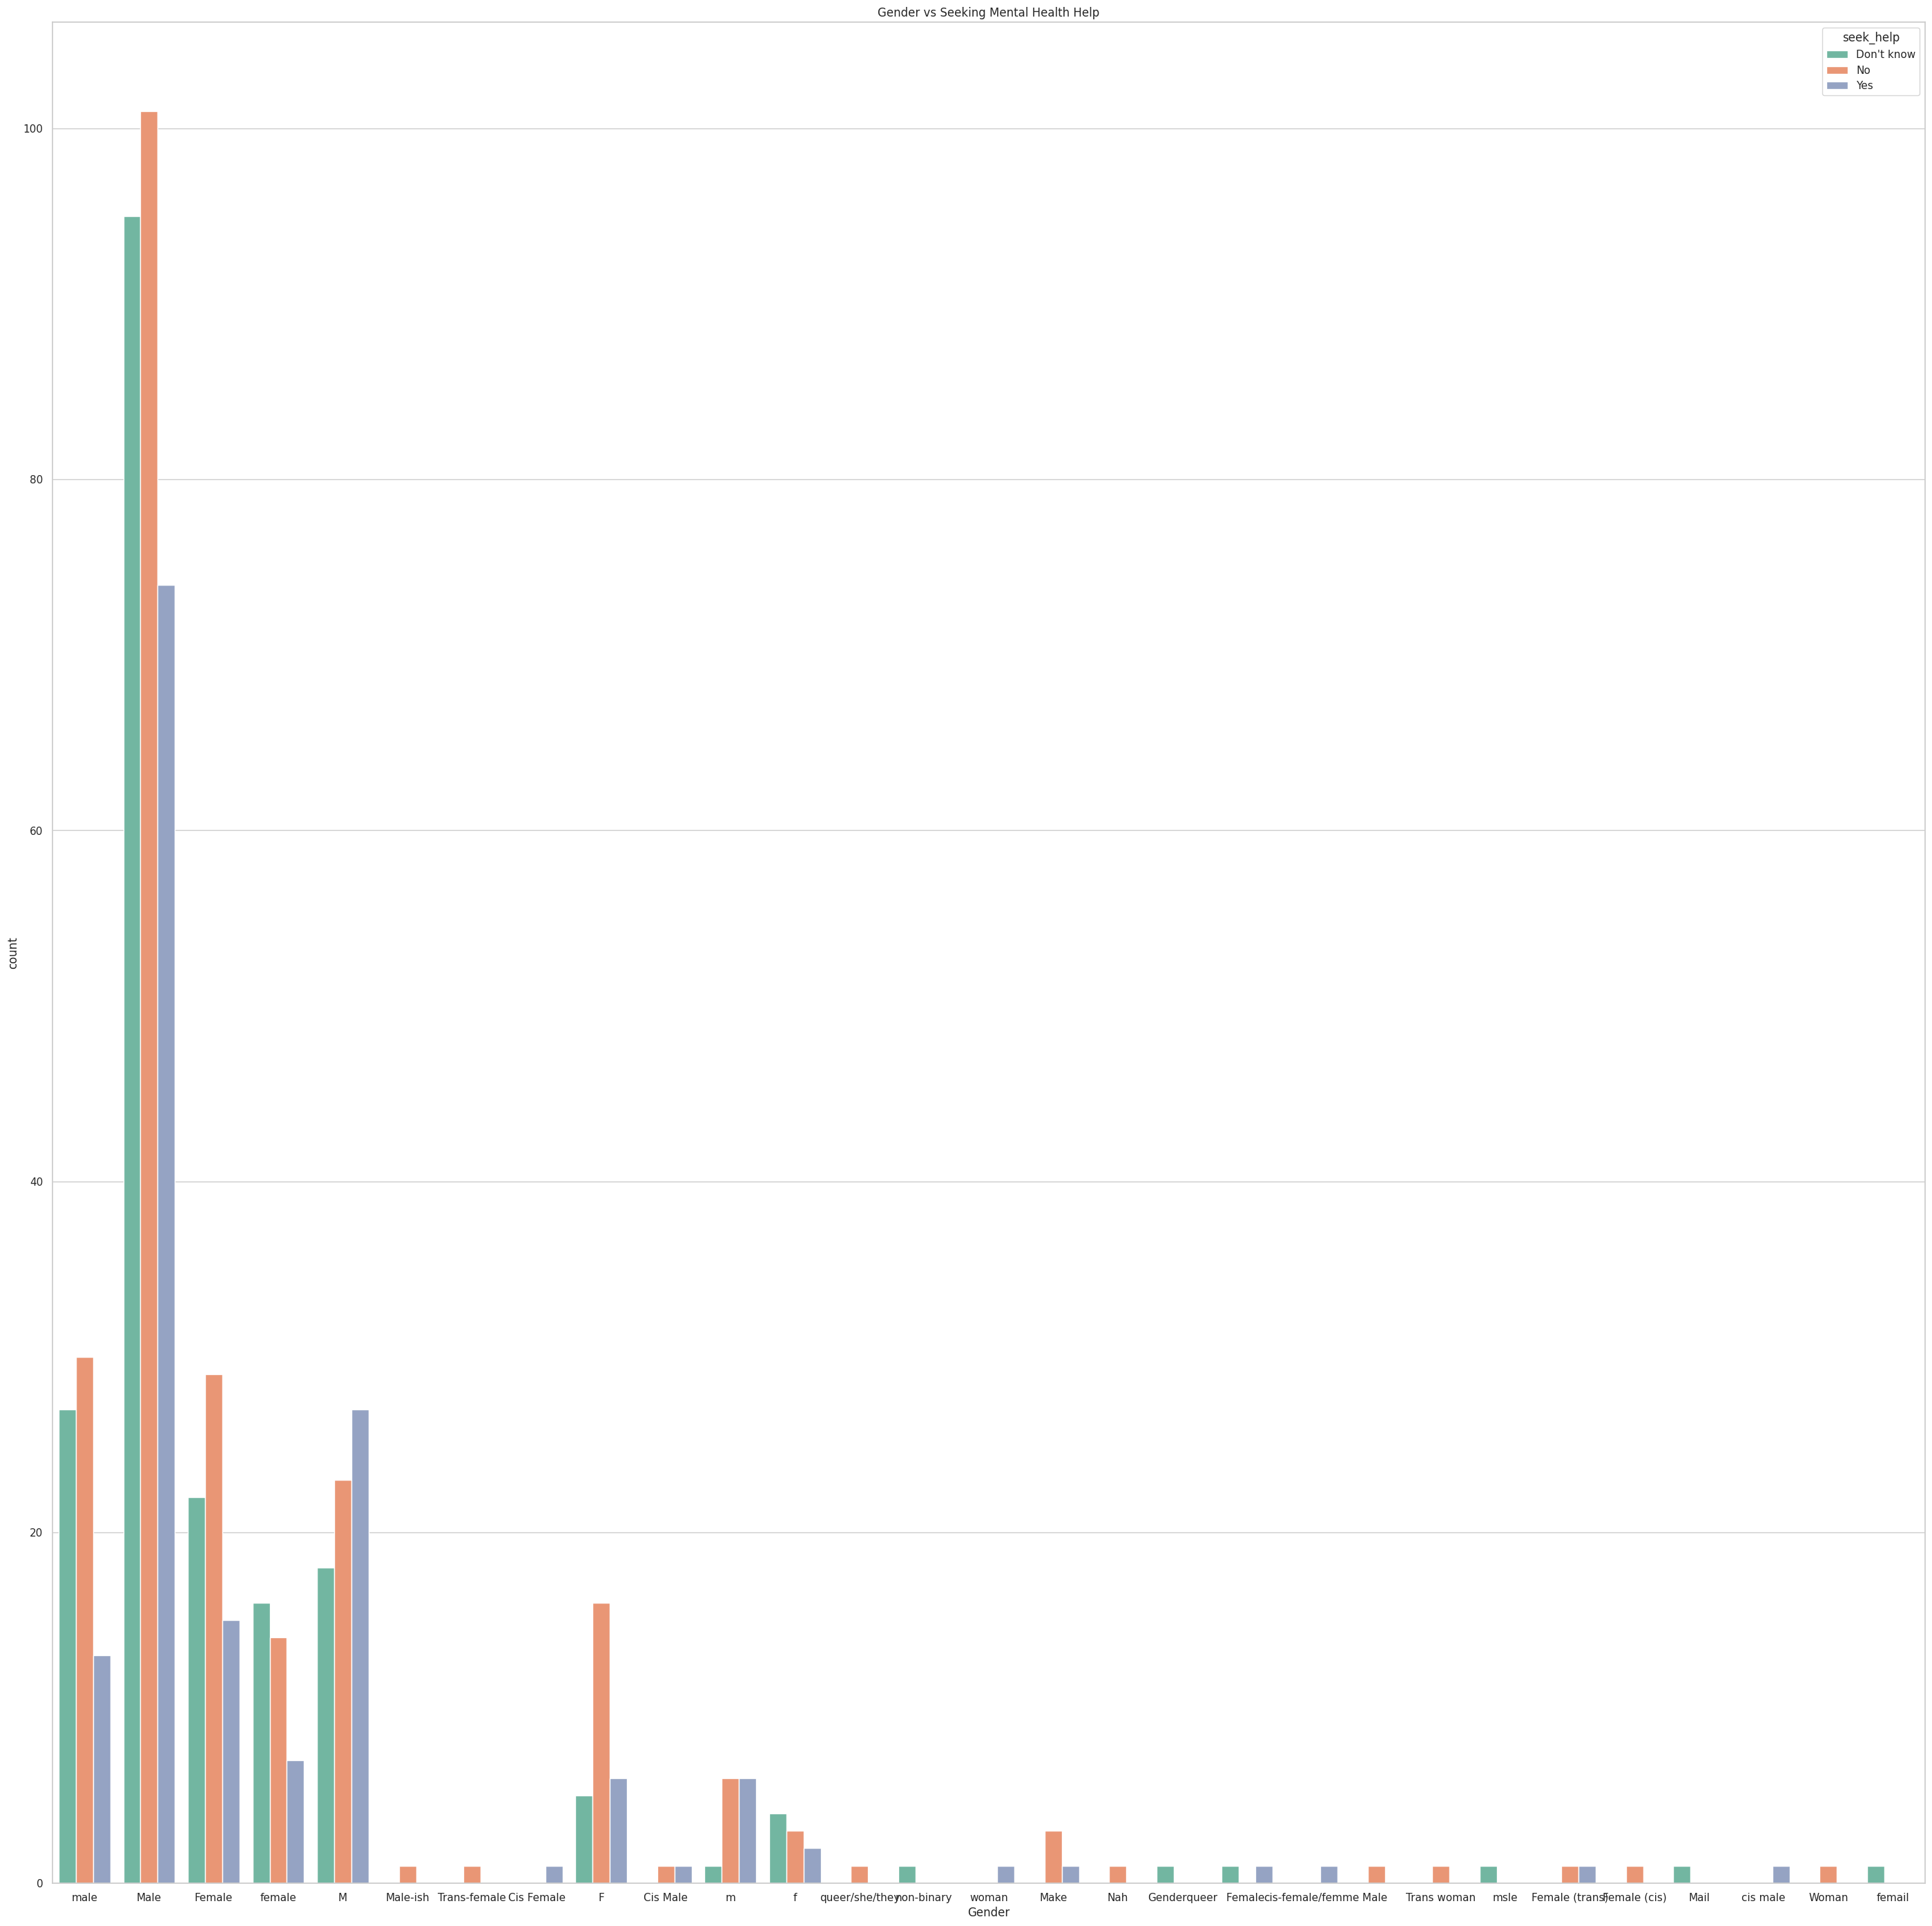

In [ ]:
if "remote_work" in df.columns and "mental_health_consequence" in df.columns:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x="remote_work", hue="mental_health_consequence")
    plt.title("Remote Work vs Mental Health Consequences")
    plt.show()

if "Gender" in df.columns and "seek_help" in df.columns:
    plt.figure(figsize=(35,35))
    sns.countplot(data=df, x="Gender", hue="seek_help")
    plt.title("Gender vs Seeking Mental Health Help")
    plt.show()


**Key Insights (Text)**

In [ ]:
print("\n📌 Key Insights:")
print("1. Gender distribution shows male dominance in tech, but women are more open to discussing mental health.")
print("2. In India, fewer companies provide mental health benefits compared to global averages.")
print("3. Employees in companies with formal benefits report fewer negative consequences.")
print("4. Remote workers face less stigma and are more likely to seek help.")
print("5. Interactive plots highlight how age, gender, and company size shape mental health outcomes.")



📌 Key Insights:
1. Gender distribution shows male dominance in tech, but women are more open to discussing mental health.
2. In India, fewer companies provide mental health benefits compared to global averages.
3. Employees in companies with formal benefits report fewer negative consequences.
4. Remote workers face less stigma and are more likely to seek help.
5. Interactive plots highlight how age, gender, and company size shape mental health outcomes.
